# Step5b: Perturbation Simulation

## Dependencies

In [2]:
import mudata
import os
import scanpy as sc
import anndata
import matplotlib
import matplotlib.pyplot as plt
import adjustText
import numpy as np
import pandas as pd
import sys

In [3]:
from scenicplus.simulation import (
    train_gene_expression_models,
    simulate_perturbation,
    plot_perturbation_effect_in_embedding
)

2025-01-09 11:44:31,609	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [38]:
# Determine the folder in which the code is executed
WORKING_DIR = os.getcwd()
sys.path.append(os.path.abspath( WORKING_DIR))

# Run the params codes
%run -i ../../globalParams.py #GlobalParams
%run -i ../../sampleParams.py #sampleParams
%run -i ./analysisParams.py #AnalysisParams
import analysisUtils  #AnalysisUtils (hand written functions)

<Figure size 640x480 with 0 Axes>

In [5]:
%matplotlib inline

In [6]:
#Read the mudata object
scplus_mdata = mudata.read(os.path.join(PATH_TO_THE_04d_OUPUT_FOLDER , "outs/scplusmdata.h5mu"))

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  w

In [8]:
eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
    axis = 1,
)
eRegulon_gene_AUC.obs = scplus_mdata.obs


## PCA Visualization

In [10]:
sc.pp.pca(eRegulon_gene_AUC)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_CCL4': '#1f77b4', 'ILC1': '#ff7f0e', 'NK3_CAMK4': '#2ca02c', 'NK1_FGFBP2': '#d62728', 'NK2_XCL1': '#9467bd', 'NK3_GZMK': '#8c564b', 'NK2_NFKB1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'ILC3': '#bcbd22', 'NK_Prolif': '#17becf'}


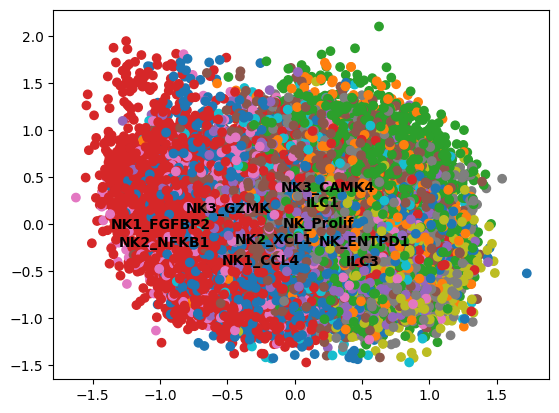

In [12]:
#PCA visualization
fig, ax = plt.subplots()
analysisUtils.plot_mm_line_pca(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)


In [13]:
# Combine all unique (Gene, TF) pairs from both direct and extended eRegulon metadata
gene_tf_direct_extended = pd.concat(
    [
        # Select Gene–TF pairs from direct eRegulons and remove duplicates
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),
        
        # Select Gene–TF pairs from extended eRegulons and remove duplicates
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()  # Remove any duplicates that may exist across the two datasets

# Create a dictionary mapping each gene to a list of its associated TFs
gene_to_TF = (
    gene_tf_direct_extended
    .groupby("Gene")["TF"]                     # Group by gene
    .apply(lambda tfs: list(tfs))              # Convert the group of TFs to a list
    .to_dict()                                 # Convert the resulting Series to a dictionary
)


## UMAP Visualization

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


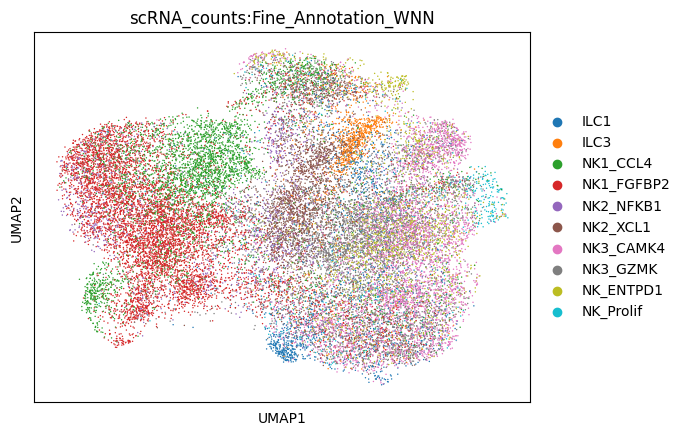

In [14]:
#Dimension reduction and dataviz
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")
sc.tl.umap(eRegulon_gene_AUC)
sc.pl.umap(eRegulon_gene_AUC, color =  "scRNA_counts:"+ CELL_TYPE_COLNAME)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_CCL4': '#1f77b4', 'ILC1': '#ff7f0e', 'NK3_CAMK4': '#2ca02c', 'NK1_FGFBP2': '#d62728', 'NK2_XCL1': '#9467bd', 'NK3_GZMK': '#8c564b', 'NK2_NFKB1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'ILC3': '#bcbd22', 'NK_Prolif': '#17becf'}


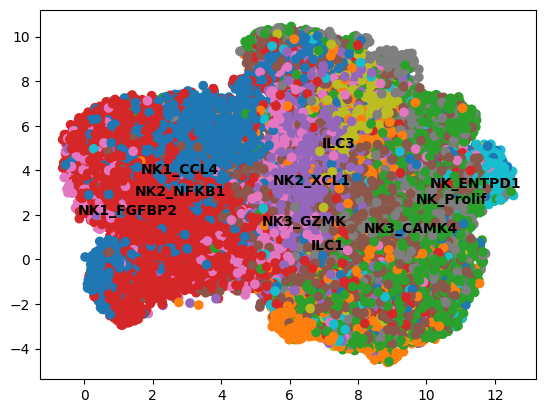

In [16]:
#UMAP visualization
fig, ax = plt.subplots()
analysisUtils.plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)

In [17]:
# Combine unique Gene–TF pairs from both direct and extended eRegulon metadata

gene_tf_direct_extended = pd.concat(
    [
        # Extract and deduplicate (Gene, TF) pairs from direct eRegulon metadata
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),

        # Extract and deduplicate (Gene, TF) pairs from extended eRegulon metadata
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()  # Ensure no duplicated (Gene, TF) pairs remain after concatenation

# Group the combined dataframe by Gene and create a dictionary mapping each gene to its list of TFs

gene_to_TF = (
    gene_tf_direct_extended
    .groupby("Gene")["TF"]                     # Group by the "Gene" column
    .apply(lambda tfs: list(tfs))              # Convert each group of TFs into a list
    .to_dict()                                 # Convert the grouped result into a dictionary
)

## WNN_UMAP Visualization

In [19]:
#Inject the WNN_UMAP values in place of UMAP
# Read the csv of the WNN_UMAP
WNN_UMAP_TABLE = pd.read_csv( os.path.join( PATH_EXPERIMENT_OUTPUT, ANALYSIS_04a0_STEP_NAME, "Embeddings",TABLE_EMBEDDING_OF_INTEREST))

# Step 1: Rename the first column of WNN_UMAP_TABLE to 'cell_names'
# Create a dictionary to map old column names to new ones
column_mapping = {
    WNN_UMAP_TABLE.columns[0]: 'cell_names',
    WNN_UMAP_TABLE.columns[1]: 'WNNUMAP_1',
    WNN_UMAP_TABLE.columns[2]: 'WNNUMAP_2'
}

# Rename the columns
WNN_UMAP_TABLE = WNN_UMAP_TABLE.rename(columns=column_mapping)

# Step 2: Modify the names in the 'cell_names' column to match the format in eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE['cell_names'] = WNN_UMAP_TABLE['cell_names'].apply(lambda x: '-'.join(x.split('_')[1:]) + '-' + x.split('_')[0] + '___' + x.split('_')[0])

# Step 3: Keep only rows where 'cell_names' in WNN_UMAP_TABLE match with eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE_filtered = WNN_UMAP_TABLE[WNN_UMAP_TABLE['cell_names'].isin(eRegulon_gene_AUC.obs_names)]

# Step 4: Reorder WNN_UMAP_TABLE_filtered to match the order of eRegulon_gene_AUC.obs_names
WNN_UMAP_TABLE_ordered = WNN_UMAP_TABLE_filtered.set_index('cell_names').reindex(eRegulon_gene_AUC.obs_names).reset_index()

# Check the reordered table
print(WNN_UMAP_TABLE_ordered)

                                  index  WNNUMAP_1  WNNUMAP_2
0        TGGCCAATCGTGCCTT-1-CSS4___CSS4   2.598336   1.187242
1      CCATCATGTTTGACCT-1-CSS21___CSS21   3.120559  -3.067575
2      CCAACCAAGCATGCAT-1-CSS23___CSS23  -0.742755  -4.601749
3      AGGATATAGAAACTGG-1-CSS23___CSS23  -0.113497   3.734633
4        CTTGACGAGCCGCAAC-1-CSS7___CSS7   2.850867   4.563372
...                                 ...        ...        ...
28417    CCGCTAAAGGTCCACA-1-CSS4___CSS4   3.803852  -2.743163
28418  AGAAGGTGTAGCTGCG-1-CSS21___CSS21   3.866725   3.080783
28419    TCAACAATCACAGCGC-1-CSS1___CSS1  -6.598150  -1.293247
28420  GCGAAGTAGTGTTGTA-1-CSS23___CSS23   0.981569   3.645255
28421    GTGGTTAGTTTAACGG-1-CSS4___CSS4  -0.909354  -5.189825

[28422 rows x 3 columns]


In [20]:
#Inject the values of WNN_UMAP
# Step 1: Extract the 'WNNUMAP_1' and 'WNNUMAP_2' columns from WNN_UMAP_TABLE_ordered
wnn_umap_values = WNN_UMAP_TABLE_ordered[['WNNUMAP_1', 'WNNUMAP_2']].values

# Step 2: Inject these values into eRegulon_gene_AUC.obsm["X_umap"]
eRegulon_gene_AUC.obsm["X_umap"] = wnn_umap_values

# Step 3: Check that the values were successfully updated
print(eRegulon_gene_AUC.obsm["X_umap"])

[[ 2.59833623  1.18724163]
 [ 3.12055875 -3.06757467]
 [-0.7427545  -4.60174935]
 ...
 [-6.59815    -1.29324691]
 [ 0.98156859  3.64525516]
 [-0.90935411 -5.18982499]]


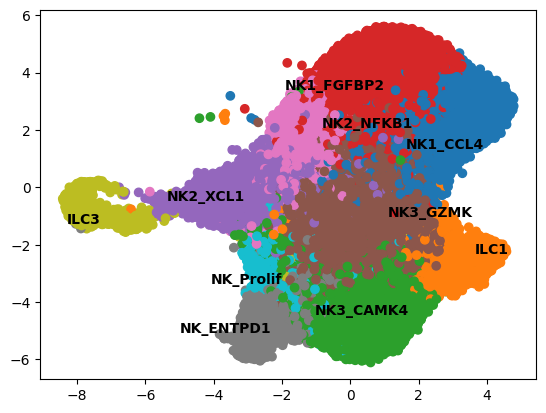

In [21]:
# Have a look at the figures
fig, ax = plt.subplots()
analysisUtils.plot_mm_line_umap(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)

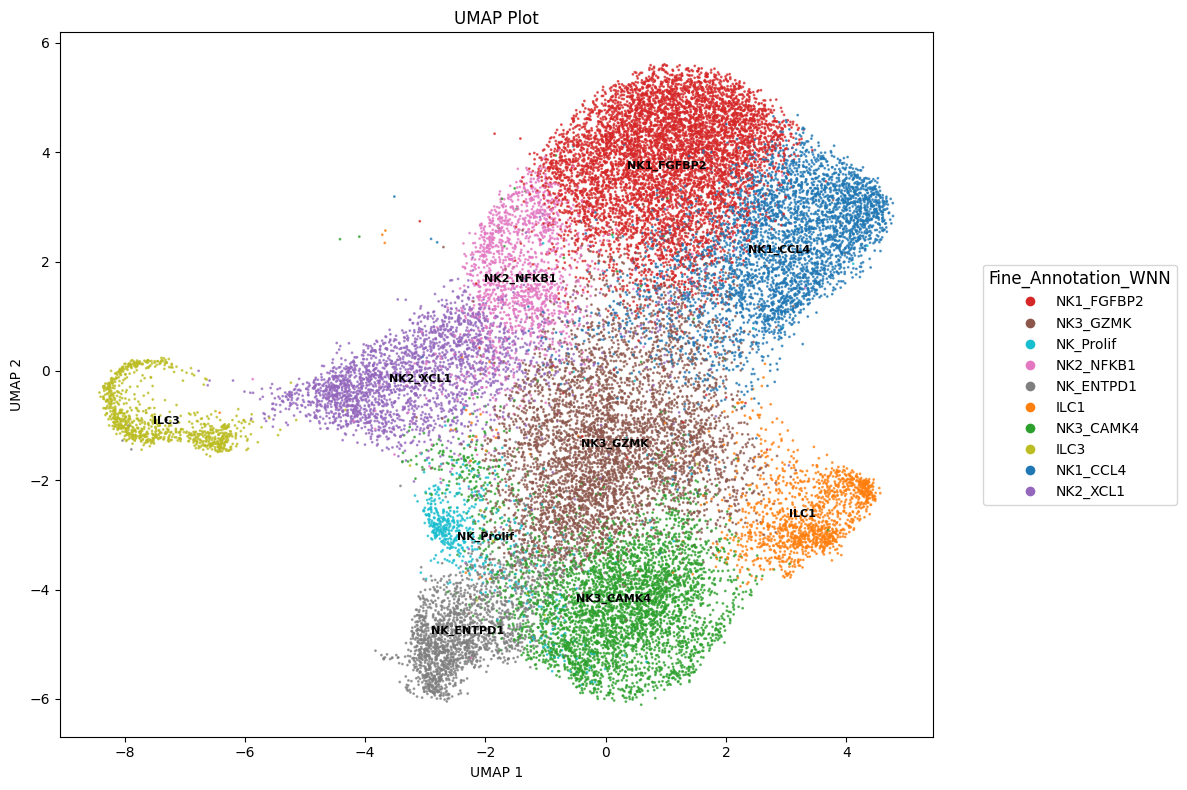

In [22]:
#Improved dataviz

fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
analysisUtils.plot_mm_line_umap_Improved(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)
plt.show()

In [28]:
the_values_to_see = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])
print(the_values_to_see[5:11])

['NK3_GZMK', 'NK2_NFKB1', 'NK_ENTPD1', 'ILC3', 'NK_Prolif']
Categories (10, object): ['ILC1', 'ILC3', 'NK1_CCL4', 'NK1_FGFBP2', ..., 'NK3_CAMK4', 'NK3_GZMK', 'NK_ENTPD1', 'NK_Prolif']


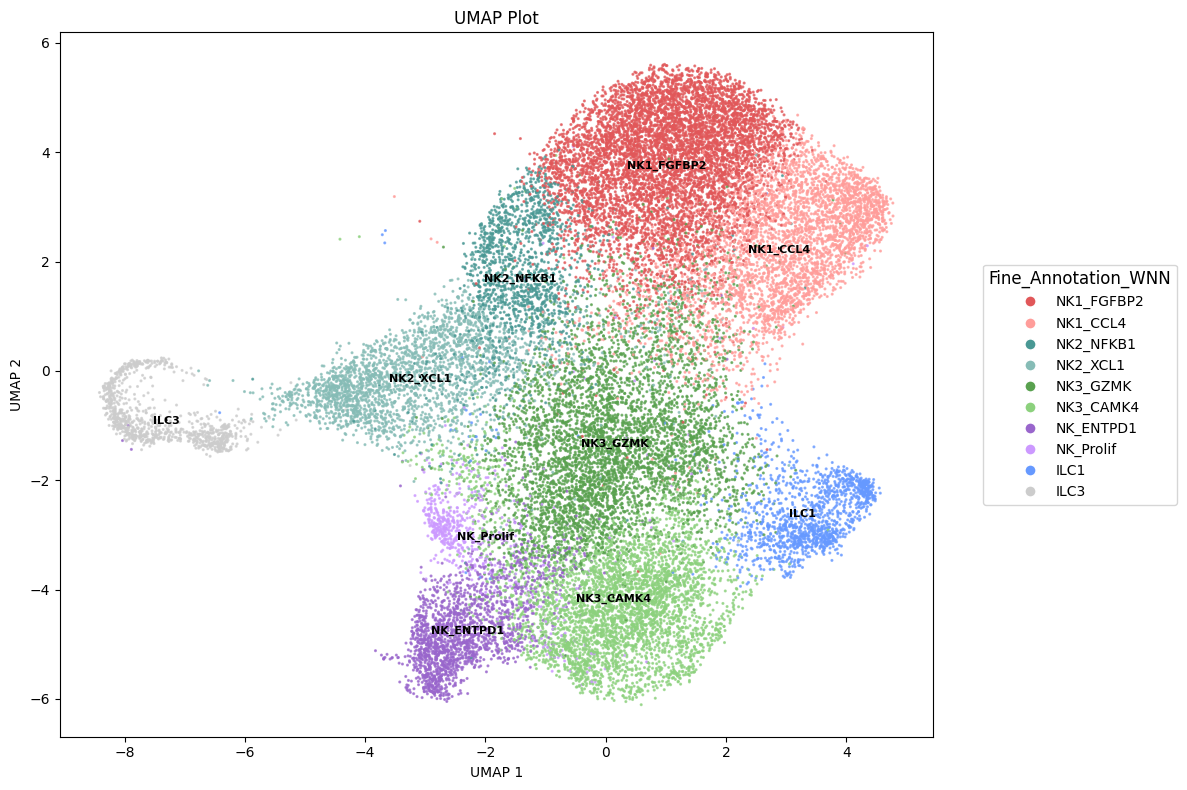

In [32]:
# Create color dictionary
color_dict_line_final = dict(zip(cluster_names, color_codes))

# Usage
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
analysisUtils.plot_mm_line_umap_Improved(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line_final)
plt.show()

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Correct import for color conversion

# Extract unique values
unique_values = pd.unique(eRegulon_gene_AUC.obs["scRNA_counts:" + CELL_TYPE_COLNAME])

# Generate a colormap with the same number of unique values
colormap = plt.cm.get_cmap('tab10', len(unique_values))  # You can choose different colormaps

# Create the color dictionary
color_dict_line = {unique_value: mcolors.rgb2hex(colormap(i)) for i, unique_value in enumerate(unique_values)}

# Display the color dictionary
print(color_dict_line)

{'NK1_CCL4': '#1f77b4', 'ILC1': '#ff7f0e', 'NK3_CAMK4': '#2ca02c', 'NK1_FGFBP2': '#d62728', 'NK2_XCL1': '#9467bd', 'NK3_GZMK': '#8c564b', 'NK2_NFKB1': '#e377c2', 'NK_ENTPD1': '#7f7f7f', 'ILC3': '#bcbd22', 'NK_Prolif': '#17becf'}


In [39]:
# Combine unique Gene–TF pairs from both direct and extended eRegulon metadata

gene_tf_direct_extended = pd.concat(
    [
        # Extract and deduplicate (Gene, TF) pairs from direct eRegulon metadata
        scplus_mdata.uns["direct_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates(),

        # Extract and deduplicate (Gene, TF) pairs from extended eRegulon metadata
        scplus_mdata.uns["extended_e_regulon_metadata"][["Gene", "TF"]].drop_duplicates()
    ]
).drop_duplicates()  # Ensure no duplicated (Gene, TF) pairs remain after concatenation

# Group the combined dataframe by Gene and create a dictionary mapping each gene to its list of TFs

gene_to_TF = (
    gene_tf_direct_extended
    .groupby("Gene")["TF"]                     # Group by the "Gene" column
    .apply(lambda tfs: list(tfs))              # Convert each group of TFs into a list
    .to_dict()                                 # Convert the grouped result into a dictionary
)

## Plot with TF driven modifications

## Perturbation analysis

In [41]:
# use a subset of genes, just so the notebook runs fast
genes_to_use = scplus_mdata.uns["direct_e_regulon_metadata"].sort_values("triplet_rank")["Gene"].iloc[0:5_000].drop_duplicates()

In [42]:
regressors = train_gene_expression_models(
    df_EXP = scplus_mdata["scRNA_counts"].to_df(),
    gene_to_TF = gene_to_TF,
    genes = genes_to_use,
)

100%|█████████████████████████████████████| 1672/1672 [1:54:41<00:00,  4.12s/it]


In [47]:
perturbation_over_iter = simulate_perturbation(
    df_EXP = scplus_mdata["scRNA_counts"].to_df(),
    perturbation = {FT_OF_INTEREST: 0},
    keep_intermediate = True,
    n_iter = 5,
    regressors = regressors
)


/tmp/ipykernel_879199/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_879199/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_879199/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_879199/3781418213.py:13: RuntimeWarning: divide by zero encountered in log2
  np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
/tmp/ipykernel_879199/3781418213.py:13: 

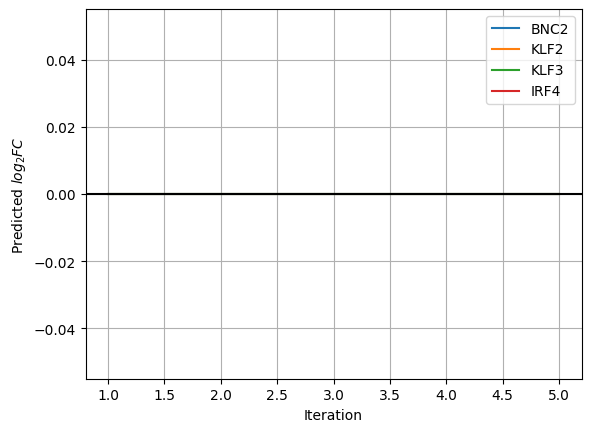

In [48]:
# Set the file path for saving the plot
output_path = os.path.join(PATH_ANALYSIS_OUTPUT, "Donwstream_Genes_After_disruption", f"{FT_OF_INTEREST}_perturbation_effect_in_{GROUP_OF_INTEREST}cluster.pdf")


genes_to_show = gene_to_TF[FT_OF_INTEREST]
cell_line = GROUP_OF_INTEREST
fig, ax = plt.subplots()
baseline = perturbation_over_iter[0].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, genes_to_show]
for gene in genes_to_show:
    ax.plot(
        np.arange(5) + 1,
        [
            np.log2(perturbation_over_iter[i].groupby(eRegulon_gene_AUC.obs["scRNA_counts:"+ CELL_TYPE_COLNAME]).mean().loc[cell_line, gene] / baseline[gene])
            for i in np.arange(5) + 1
        ],
        label = gene
    )
ax.set_ylabel("Predicted $log{_2}FC$")
ax.set_xlabel("Iteration")
ax.legend()
ax.axhline(y = 0, color = "black")
ax.grid("gray")
ax.set_axisbelow(True)

# Save the plot to the specified file path
plt.savefig(output_path, format='pdf')

2025-01-13 09:13:41,557 Perturbation INFO     Generating ranking based on perturbed matrix.
2025-01-13 09:15:59,732 Perturbation INFO     Scoring eRegulons.
2025-01-13 09:16:25,879 Perturbation INFO     Projecting perturbation effect in embedding


/opt/conda/lib/python3.11/site-packages/scenicplus/simulation.py:232: RuntimeWarning: invalid value encountered in divide
  unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)  # divide by L2


2025-01-13 10:24:36,137 Perturbation INFO     Calculating grid of arrows
2025-01-13 10:24:36,272 Perturbation INFO     Plotting


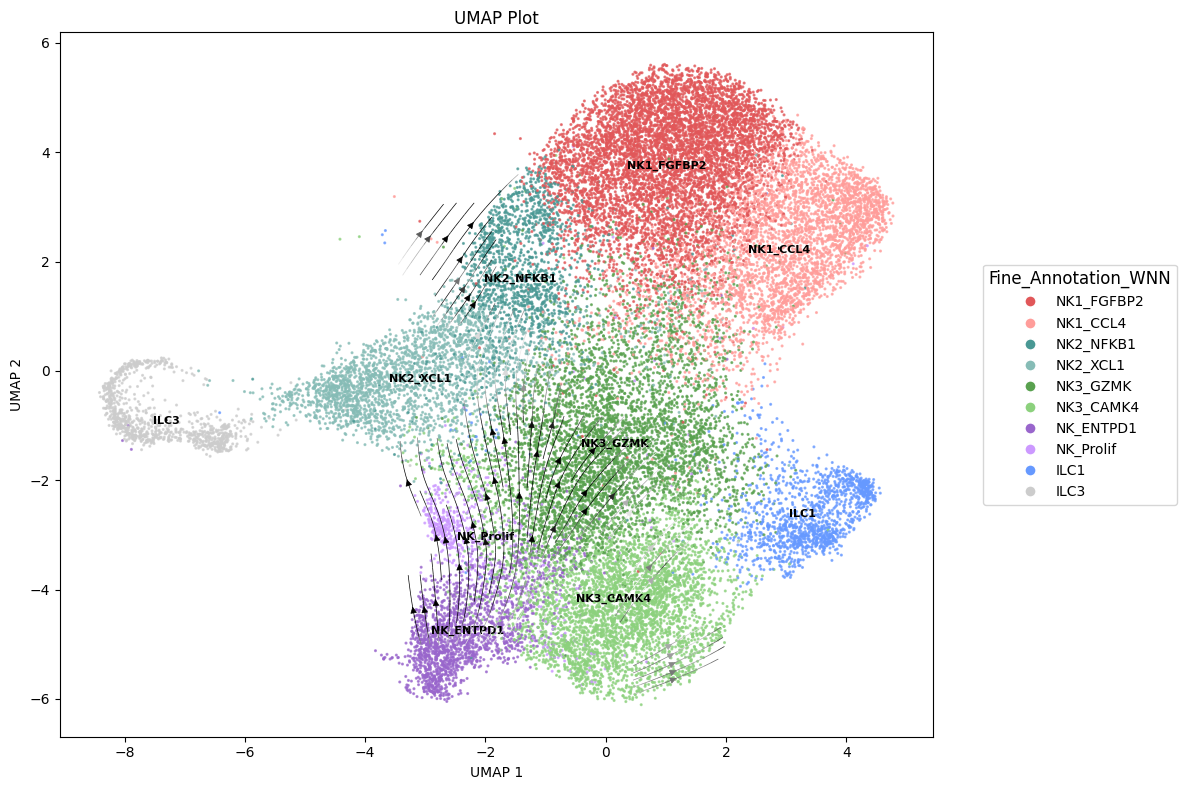

In [50]:
# Create color dictionary
color_dict_line = dict(zip(cluster_names, color_codes))

# Set the file path for saving the plot
output_path = os.path.join(PATH_ANALYSIS_OUTPUT, "Disrupted_heatmap", f"{FT_OF_INTEREST}_perturbation_effect.pdf")

# Usage
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size to accommodate legend
analysisUtils.plot_mm_line_umap_Improved(ax, eRegulon_gene_AUC, CELL_TYPE_COLNAME, color_dict_line)

# Umap Dataviz
plot_perturbation_effect_in_embedding(
    perturbed_matrix = perturbation_over_iter[5],
    original_matrix = perturbation_over_iter[0],
    embedding = eRegulon_gene_AUC.obsm["X_umap"][:, 0:2],
    AUC_kwargs = {},
    ax = ax,
    eRegulons = pd.concat(
        [
            scplus_mdata.uns["direct_e_regulon_metadata"],
            scplus_mdata.uns["extended_e_regulon_metadata"]
        ]
    ),
    n_cpu = NUMBER_CPU
)

# Save the plot to the specified file path
plt.savefig(output_path, format='pdf')